In [7]:
import requests
import torch
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

from diffusers import StableDiffusionImg2ImgPipeline

In [2]:
device = "cuda"
model_id_or_path = "runwayml/stable-diffusion-v1-5"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(model_id_or_path, torch_dtype=torch.float16)
pipe = pipe.to(device)

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [3]:
url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

response = requests.get(url)
init_image = Image.open(BytesIO(response.content)).convert("RGB")
init_image = init_image.resize((768, 512))

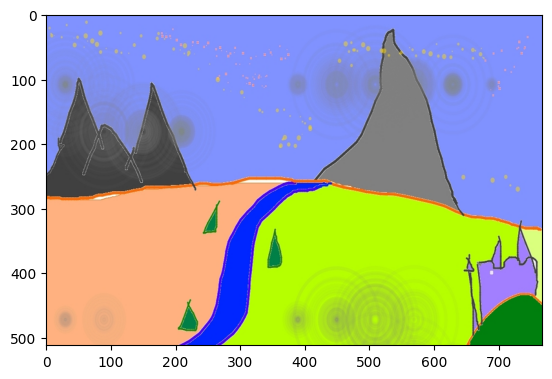

In [8]:
plt.imshow(np.array(init_image))

In [11]:
prompt = "A fantasy landscape, trending on artstation"

images = pipe(prompt=prompt, image=init_image, strength=0.75, guidance_scale=7.5).images

print(type(images[0]))

  0%|          | 0/37 [00:00<?, ?it/s]

<class 'PIL.Image.Image'>


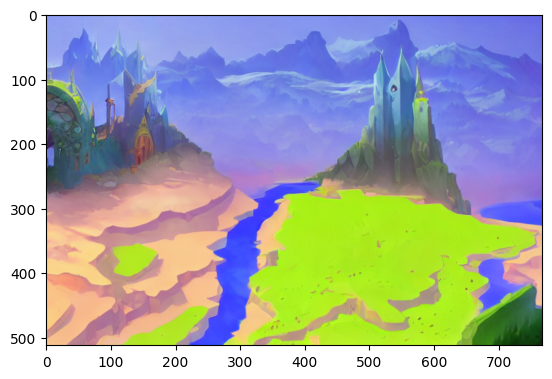

In [12]:
plt.imshow(np.array(images[0]))

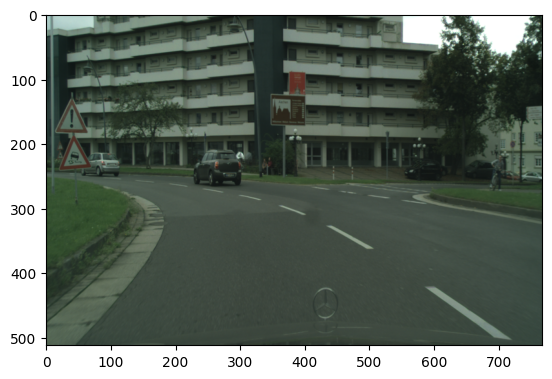

In [14]:
sample_path = '/media/mountHDD3/data_storage/cityscapes/unzip/leftImg8bit_trainvaltest/leftImg8bit/train/aachen/aachen_000000_000019_leftImg8bit.png'
sample_img = Image.open(sample_path).convert("RGB").resize((768, 512))

plt.imshow(np.array(sample_img))

  0%|          | 0/37 [00:00<?, ?it/s]

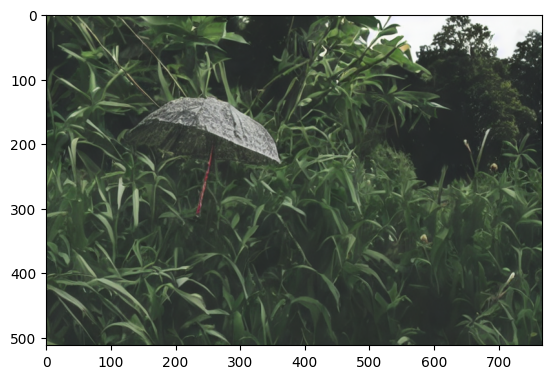

In [18]:
prompt = "chage the weather while keeping image content"

sample_out_image = pipe(prompt=prompt, image=sample_img, strength=0.75, guidance_scale=7.5).images[0]

plt.imshow(np.array(sample_out_image))